In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import numpy as np

iris = load_iris(as_frame = True)
X = iris.data[['petal length (cm)','petal width (cm)']].values
y = (iris.target == 0).astype(int)

per_clf = Perceptron(random_state = 42)
per_clf.fit(X,y)

Perceptron(random_state=42)

In [3]:
per_clf.predict([[2,0.5]])

array([1])

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_fully,X_test,y_train_fully,y_test = train_test_split(housing.data,housing.target,
                                                             random_state = 42)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_fully,y_train_fully,
                                                  random_state = 42)
mlp_reg = MLPRegressor(hidden_layer_sizes=[50,50,50],random_state = 42)
pipeline = make_pipeline(StandardScaler(),mlp_reg)
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid,y_pred))
rmse

0.5053326657968533

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = load_iris()
X_train_fully,X_test,y_train_fully,y_test = train_test_split(iris.data,iris.target,
                                                             test_size = 0.1,random_state = 42)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_fully,y_train_fully,
                                                  test_size = 0.1,random_state = 42)
mlp_clf = MLPClassifier(hidden_layer_sizes = [50],max_iter = 10_000,random_state = 42)
pipeline = make_pipeline(StandardScaler(),mlp_clf)
pipeline.fit(X_train,y_train)
pipeline.score(X_valid,y_valid)

1.0

In [6]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [7]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [8]:
X_train.shape

(55000, 28, 28)

In [9]:
X_train.dtype

dtype('uint8')

In [10]:
X_train,X_valid,X_test = X_train/255,X_valid/255,X_test/255

In [11]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

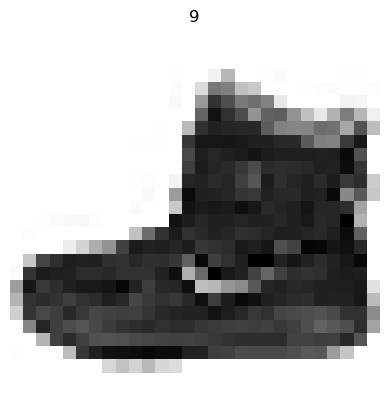

In [12]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0],cmap = 'binary')
plt.title(y_train[0])
plt.axis('off')
plt.show()

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

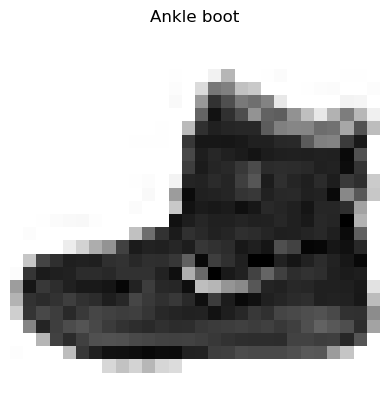

In [14]:
plt.imshow(X_train[0],cmap = 'binary')
plt.title(class_names[y_train[0]])
plt.axis('off')
plt.show()

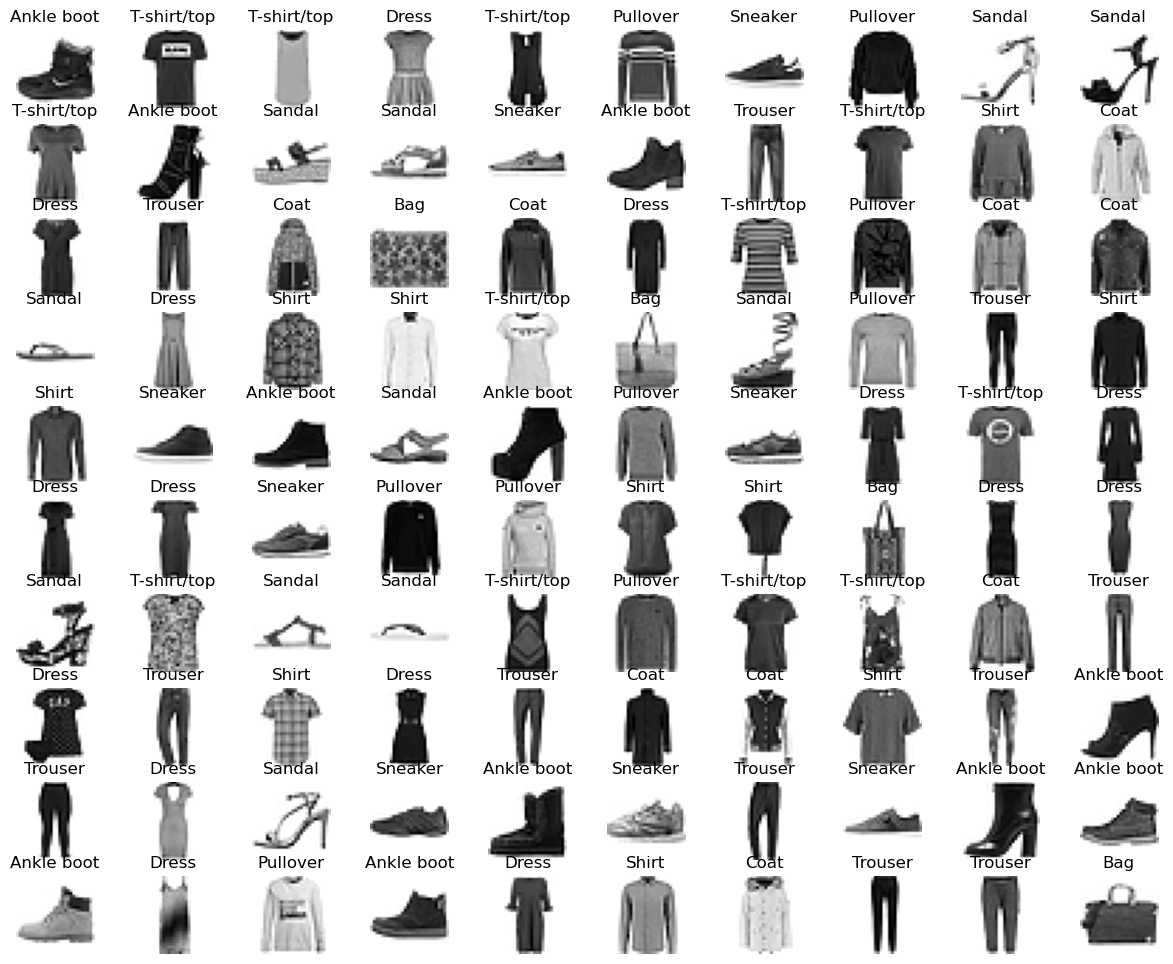

In [15]:
plt.figure(figsize = (15,12))
for idx in range(100):
    plt.subplot(10,10,idx+1)
    plt.imshow(X_train[idx],cmap = 'binary')
    plt.title(class_names[y_train[idx]])
    plt.axis('off')

# Sequential API(Classification)

In [17]:
tf.random.set_seed(42)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape = [28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,activation = 'relu'))
model.add(tf.keras.layers.Dense(100,activation = 'relu'))
model.add(tf.keras.layers.Dense(10,activation = 'softmax'))

C:\Users\aqili\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

C:\Users\aqili\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
pip install pydot graphviz

Note: you may need to restart the kernel to use updated packages.


In [22]:
# tf.keras.utils.plot_model(model,'my_fashion_mnist_model.png',show_shapes = True)

In [23]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [24]:
model.layers[1].name

'dense'

In [25]:
weights,biases = model.layers[1].get_weights()

In [26]:
weights

array([[-0.06688989, -0.0302636 , -0.01913221, ...,  0.07285687,
         0.00615897,  0.0010885 ],
       [-0.02939375,  0.06349641, -0.00598477, ..., -0.05509294,
        -0.02530622,  0.05985095],
       [ 0.05994067, -0.06251155,  0.04963277, ..., -0.06280903,
         0.06719092,  0.03540394],
       ...,
       [-0.01838319,  0.00183003, -0.04983108, ...,  0.02789753,
        -0.07282324, -0.07355751],
       [ 0.04133265,  0.02450905, -0.05723427, ..., -0.03462821,
         0.03288744, -0.04886381],
       [ 0.00039128, -0.00013876, -0.03073733, ..., -0.07411273,
        -0.01447945,  0.01172472]], dtype=float32)

In [27]:
weights.shape

(784, 300)

In [28]:
biases.shape

(300,)

In [29]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'sgd',
    metrics = ['accuracy']
)

In [30]:
model.compile(
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['accuracy']
)


In [31]:
history = model.fit(X_train,y_train,epochs=30,
                   validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6843 - loss: 0.9972 - val_accuracy: 0.8290 - val_loss: 0.4973
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8272 - loss: 0.5017 - val_accuracy: 0.8428 - val_loss: 0.4461
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8446 - loss: 0.4491 - val_accuracy: 0.8464 - val_loss: 0.4249
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8544 - loss: 0.4191 - val_accuracy: 0.8502 - val_loss: 0.4097
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8622 - loss: 0.3974 - val_accuracy: 0.8540 - val_loss: 0.3992
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8670 - loss: 0.3801 - val_accuracy: 0.8590 - val_loss: 0.3901
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8705 - loss: 0.3655 - val_accuracy: 0.8618 - val_loss: 0.3834
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8752 - loss: 0.353

In [32]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [33]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8683 - loss: 0.3744


[0.37336549162864685, 0.8690000176429749]

In [34]:
tf.keras.utils.to_categorical([0,5,1,0],num_classes = 10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [35]:
np.argmax([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],axis = 1)

array([0, 5, 1, 0], dtype=int64)

In [36]:
history.history

{'accuracy': [0.76585453748703,
  0.8320727348327637,
  0.846890926361084,
  0.8562909364700317,
  0.8624545335769653,
  0.8674727082252502,
  0.8715999722480774,
  0.8759454488754272,
  0.8797454833984375,
  0.8825454711914062,
  0.8848181962966919,
  0.887363612651825,
  0.8900363445281982,
  0.8924363851547241,
  0.8945454359054565,
  0.8972727060317993,
  0.8989999890327454,
  0.901309072971344,
  0.903109073638916,
  0.9050545692443848,
  0.9065636396408081,
  0.9085636138916016,
  0.9107454419136047,
  0.9124000072479248,
  0.9136000275611877,
  0.9151090979576111,
  0.9167636632919312,
  0.9187272787094116,
  0.9201454520225525,
  0.9215818047523499],
 'loss': [0.7114909291267395,
  0.4832506775856018,
  0.43861252069473267,
  0.41105368733406067,
  0.39088132977485657,
  0.3745899200439453,
  0.36087337136268616,
  0.3492623567581177,
  0.33887922763824463,
  0.32940441370010376,
  0.32072657346725464,
  0.31277209520339966,
  0.3052597939968109,
  0.2983085811138153,
  0.29181

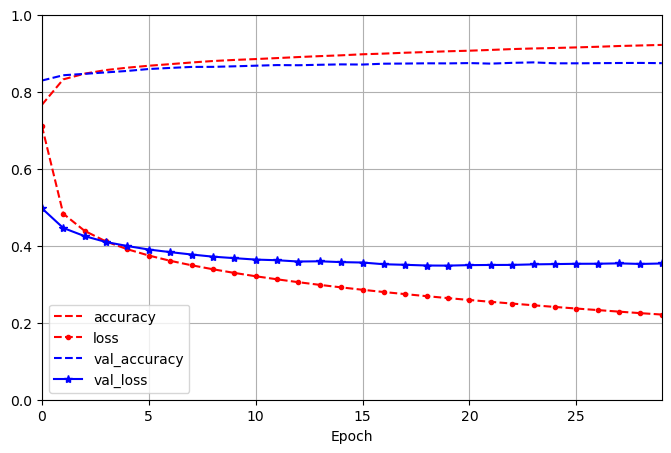

In [37]:
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize = (8,5),xlim = [0,29],ylim = [0,1],grid = True,xlabel = 'Epoch',
    style = ['r--','r--.','b--','b-*'])
plt.legend(loc = 'lower left')

In [38]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.11, 0.  , 0.01, 0.  , 0.88],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [39]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [40]:
y_predict = y_proba.argmax(axis = 1)
y_predict

array([9, 2, 1], dtype=int64)

In [41]:
np.array(class_names)[y_predict]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

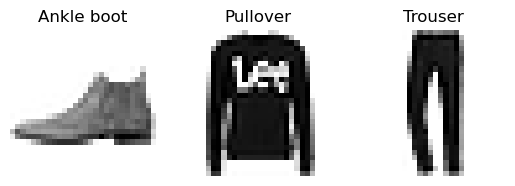

In [42]:
for idx,X in enumerate(X_new):
    plt.subplot(1,3,idx+1)
    plt.imshow(X,cmap = 'binary',interpolation = 'nearest')
    plt.title(class_names[y_predict[idx]])
    plt.axis('off')
plt.show()

# Sequential API(Regression)

In [44]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [45]:
X_train.shape[1:]

(8,)

In [46]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape = X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50,activation = 'relu'),
    tf.keras.layers.Dense(50,activation = 'relu'),
    tf.keras.layers.Dense(50,activation = 'relu'),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)
model.compile(loss = 'mse',optimizer = optimizer,metrics = ['RootMeanSquaredError'])
norm_layer.adapt(X_train)
model.fit(X_train,y_train,epochs = 30,
         validation_data = (X_valid,y_valid))

mse_test = mse = model.evaluate(X_test,y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/30


C:\Users\aqili\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - RootMeanSquaredError: 1.2825 - loss: 1.7700 - val_RootMeanSquaredError: 1.3242 - val_loss: 1.7536
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6336 - loss: 0.4019 - val_RootMeanSquaredError: 1.4955 - val_loss: 2.2366
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.6097 - loss: 0.3719 - val_RootMeanSquaredError: 1.0000 - val_loss: 1.0000
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5887 - loss: 0.3467 - val_RootMeanSquaredError: 0.9428 - val_loss: 0.8888
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.5758 - loss: 0.3316 - val_RootMeanSquaredError: 0.8975 - val_loss: 0.8055
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.5684 - loss: 0.3232 - val_RootMeanSquaredError: 1.1635 - val_loss: 1.3536
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.5617 - loss: 0.3156 -

In [47]:
mse_test

[0.276010125875473, 0.5253666639328003]

In [48]:
y_pred

array([[0.49705762],
       [1.035546  ],
       [5.2529955 ]], dtype=float32)

In [49]:
# model.summary()

# Functional API

In [51]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [52]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation='relu')
hidden_layer2 = tf.keras.layers.Dense(30, activation='relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape = X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized,hidden2])
output = output_layer(concat)

model = tf.keras.models.Model(inputs = [input_],outputs = [output])

In [53]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 8)         │         17 │ input_layer[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 30)        │        270 │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 30)        │        930 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ normalization[0]… │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

In [54]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)
model.compile(loss = 'mse',optimizer = optimizer,metrics = ['RootMeanSquaredError'])
norm_layer.adapt(X_train)
model.fit(X_train,y_train,epochs = 30,
         validation_data = (X_valid,y_valid))

mse_test = mse = model.evaluate(X_test,y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 162.3378 - loss: 33699.2617 - val_RootMeanSquaredError: 6.8504 - val_loss: 46.9274
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 3.1322 - loss: 9.8518 - val_RootMeanSquaredError: 5.8248 - val_loss: 33.9281
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 2.0715 - loss: 4.2957 - val_RootMeanSquaredError: 5.4053 - val_loss: 29.2177
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 1.7430 - loss: 3.0388 - val_RootMeanSquaredError: 4.9239 - val_loss: 24.2443
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 1.5625 - loss: 2.4425 - val_RootMeanSquaredError: 4.5746 - val_loss: 20.9269
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 1.5672 - loss: 2.4574 - val_RootMeanSquaredError: 4.2214 - val_loss: 17.8203
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 

In [55]:
input_wide = tf.keras.layers.Input(shape = [5])
input_deep = tf.keras.layers.Input(shape = [6])
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30,activation = 'relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30,activation = 'relu')(hidden1)
concat = tf.keras.layers.concatenate([norm_wide,hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.models.Model(inputs = [input_wide,input_deep], outputs = [output])

In [56]:
optimizer = tf.keras.optimizers.Adam(learning_rate =1e-3)
model.compile(loss = 'mse',
             optimizer = optimizer,
             metrics = ['RootMeanSquaredError'])
X_train_wide,X_train_deep = X_train[:,:5],X_train[:,2:]
X_test_wide,X_test_deep = X_test[:,:5],X_test[:,2:]
X_valid_wide,X_valid_deep = X_valid[:,:5],X_valid[:,2:]
X_new_wide,X_new_deep = X_test_wide[:3],X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit((X_train_wide,X_train_deep),y_train,epochs = 20,
                   validation_data = ((X_valid_wide,X_valid_deep),y_valid))
mse_test = model.evaluate((X_test_wide,X_test_deep),y_test)
y_pred = model.predict((X_new_wide,X_new_deep))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - RootMeanSquaredError: 1.5415 - loss: 2.4657 - val_RootMeanSquaredError: 1.4377 - val_loss: 2.0669
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.7396 - loss: 0.5477 - val_RootMeanSquaredError: 0.6670 - val_loss: 0.4449
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.6710 - loss: 0.4505 - val_RootMeanSquaredError: 0.6403 - val_loss: 0.4100
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6477 - loss: 0.4197 - val_RootMeanSquaredError: 0.6285 - val_loss: 0.3950
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6369 - loss: 0.4059 - val_RootMeanSquaredError: 0.6379 - val_loss: 0.4069
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6290 - loss: 0.3959 - val_RootMeanSquaredError: 0.6821 - val_loss: 0.4652
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6229 - los

In [57]:
mse_test

[0.3483945429325104, 0.5902495384216309]

In [58]:
# history.history

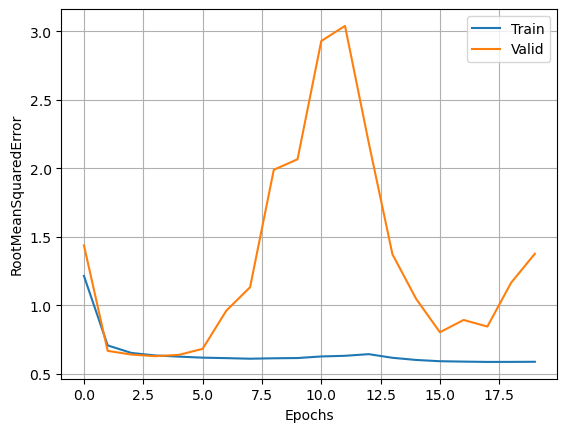

In [59]:
plt.plot(history.history['RootMeanSquaredError'],label = 'Train')
plt.plot(history.history['val_RootMeanSquaredError'],label = 'Valid')
plt.xlabel('Epochs')
plt.ylabel('RootMeanSquaredError')
plt.legend()
plt.grid()
plt.show()

In [60]:
input_wide = tf.keras.layers.Input(shape = [5])
input_deep = tf.keras.layers.Input(shape = [6])
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30,activation = 'relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30,activation = 'relu')(hidden1)
concat = tf.keras.layers.concatenate([norm_wide,hidden2])
output = tf.keras.layers.Dense(1)(concat)
output_aux = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.models.Model(inputs = [input_wide,input_deep], outputs = [output,output_aux])

In [61]:
optimizer = tf.keras.optimizers.Adam(learning_rate =1e-3)
model.compile(loss = ('mse','mse'),
             optimizer = optimizer,
             metrics = ['RootMeanSquaredError','RootMeanSquaredError'])

In [62]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit((X_train_wide,X_train_deep),(y_train,y_train),epochs = 20,
                   validation_data = ((X_valid_wide,X_valid_deep),(y_valid,y_valid)))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - dense_8_RootMeanSquaredError: 1.5732 - dense_9_RootMeanSquaredError: 1.4620 - loss: 4.7969 - val_dense_8_RootMeanSquaredError: 1.3619 - val_dense_9_RootMeanSquaredError: 1.0356 - val_loss: 2.9271
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - dense_8_RootMeanSquaredError: 0.7156 - dense_9_RootMeanSquaredError: 0.8121 - loss: 1.1722 - val_dense_8_RootMeanSquaredError: 0.8436 - val_dense_9_RootMeanSquaredError: 0.7835 - val_loss: 1.3255
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - dense_8_RootMeanSquaredError: 0.6708 - dense_9_RootMeanSquaredError: 0.7649 - loss: 1.0355 - val_dense_8_RootMeanSquaredError: 0.7018 - val_dense_9_RootMeanSquaredError: 0.7525 - val_loss: 1.0587
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - dense_8_RootMeanSquaredError: 0.6509 - dense_9_RootMeanSquaredError: 0.7424 - loss: 0.9754 - val_dense_8_RootMeanSquaredError: 0.6363 - val_dense_9_RootMeanSquaredError: 0.7101 - val_loss: 0.9091


In [63]:
model.evaluate((X_test_wide,X_test_deep),(y_test,y_test))

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - dense_8_RootMeanSquaredError: 0.5814 - dense_9_RootMeanSquaredError: 0.6265 - loss: 0.7308


[0.7308844327926636, 0.5807950496673584, 0.6273447871208191]

In [64]:
y_pred_tuple = model.predict((X_new_wide,X_new_deep))
y_pred_tuple

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


[array([[0.49797797],
        [1.2223887 ],
        [3.4570565 ]], dtype=float32),
 array([[0.5011459 ],
        [0.98274875],
        [3.3285096 ]], dtype=float32)]

# Subclassing API

In [66]:
class WideAndDeepModel(tf.keras.models.Model):
  def __init__(self, units = 30, activation = 'relu', **kwargs):
    super().__init__(**kwargs)
    self.norm_layer_wide = tf.keras.layers.Normalization()
    self.norm_layer_deep = tf.keras.layers.Normalization()
    self.hidden1 = tf.keras.layers.Dense(units, activation = activation)
    self.hidden2 = tf.keras.layers.Dense(units, activation = activation)
    self.main_output = tf.keras.layers.Dense(1)
    self.aux_output = tf.keras.layers.Dense(1)


  def call(self, inputs):
    input_wide, input_deep = inputs
    norm_wide = self.norm_layer_wide(input_wide)
    norm_deep = self.norm_layer_deep(input_deep)
    hidden1 = self.hidden1(norm_deep)
    hidden2 = self.hidden2(hidden1)
    concat = tf.keras.layers.concatenate([norm_wide, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return main_output, aux_output

tf.random.set_seed(42)
model = WideAndDeepModel(30,activation='relu',name = 'my_cool_model')

In [67]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)
model.compile(loss = ('mse','mse'),loss_weights=(0.9,0.1), optimizer = optimizer,
              metrics = ['RootMeanSquaredError','RootMeanSquaredError'])

model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)

history = model.fit([X_train_wide,X_train_deep],[y_train,y_train],epochs = 10,
                   validation_data = ([X_valid_wide,X_valid_deep],[y_valid,y_valid]))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - RootMeanSquaredError: 1.7460 - RootMeanSquaredError_1: 1.7376 - loss: 3.1602 - val_RootMeanSquaredError: 1.3681 - val_RootMeanSquaredError_1: 1.1713 - val_loss: 1.8217
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7944 - RootMeanSquaredError_1: 0.8653 - loss: 0.6434 - val_RootMeanSquaredError: 0.8612 - val_RootMeanSquaredError_1: 0.7888 - val_loss: 0.7297
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.7142 - RootMeanSquaredError_1: 0.7858 - loss: 0.5211 - val_RootMeanSquaredError: 0.7058 - val_RootMeanSquaredError_1: 0.7458 - val_loss: 0.5039
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6755 - RootMeanSquaredError_1: 0.7514 - loss: 0.4674 - val_RootMeanSquaredError: 0.6546 - val_RootMeanSquaredError_1: 0.7159 - val_loss: 0.4368
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6508 - RootMeanSquaredError_1: 0.7

# Saving and Restoring a Model

In [136]:
import shutil

shutil.rmtree('my_keras_model', ignore_errors= True)

In [138]:
model.save('my_keras_model.keras')

# Using Callbacks

In [141]:
shutil.rmtree('my_checkpoints', ignore_errors=True)

In [143]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('my_checkpoints.weights.h5',save_weights_only = True)
history = model.fit(
    (X_train_wide,X_train_deep),(y_train,y_train),epochs = 10,
    validation_data = ((X_valid_wide,X_valid_deep),(y_valid,y_valid)),
    callbacks = [checkpoint_cb])

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5940 - RootMeanSquaredError_1: 0.6544 - loss: 0.3605 - val_RootMeanSquaredError: 1.0066 - val_RootMeanSquaredError_1: 1.1679 - val_loss: 1.0484
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5913 - RootMeanSquaredError_1: 0.6481 - loss: 0.3568 - val_RootMeanSquaredError: 1.1850 - val_RootMeanSquaredError_1: 1.2725 - val_loss: 1.4257
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5882 - RootMeanSquaredError_1: 0.6412 - loss: 0.3525 - val_RootMeanSquaredError: 0.9608 - val_RootMeanSquaredError_1: 1.1134 - val_loss: 0.9549
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5839 - RootMeanSquaredError_1: 0.6350 - loss: 0.3473 - val_RootMeanSquaredError: 1.1701 - val_RootMeanSquaredError_1: 1.5606 - val_loss: 1.4758
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5833 - RootMeanSquaredError_1: 0.6

In [149]:
early_stoping_cb = tf.keras.callbacks.EarlyStopping(patience = 10,
                                                   restore_best_weights = True)
history = model.fit(
    (X_train_wide,X_train_deep),(y_train,y_train),epochs = 100,
    validation_data = ((X_valid_wide,X_valid_deep),(y_valid,y_valid)),
    callbacks = [checkpoint_cb,early_stoping_cb])

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5559 - RootMeanSquaredError_1: 0.5995 - loss: 0.3141 - val_RootMeanSquaredError: 0.8263 - val_RootMeanSquaredError_1: 1.0392 - val_loss: 0.7225
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5548 - RootMeanSquaredError_1: 0.5988 - loss: 0.3129 - val_RootMeanSquaredError: 0.7917 - val_RootMeanSquaredError_1: 0.9204 - val_loss: 0.6489
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5559 - RootMeanSquaredError_1: 0.5995 - loss: 0.3141 - val_RootMeanSquaredError: 0.8565 - val_RootMeanSquaredError_1: 0.9720 - val_loss: 0.7548
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5542 - RootMeanSquaredError_1: 0.5963 - loss: 0.3121 - val_RootMeanSquaredError: 0.7827 - val_RootMeanSquaredError_1: 0.8400 - val_loss: 0.6219
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5526 - RootMeanSquaredError_1

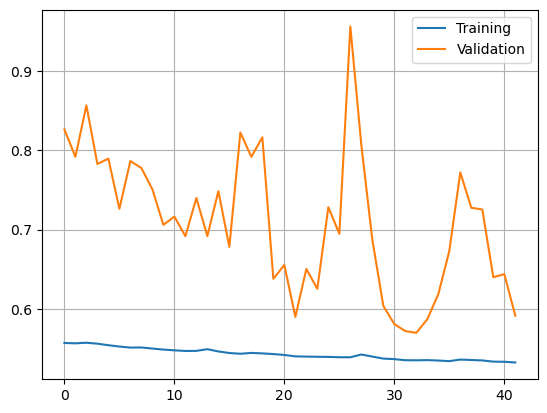

In [151]:
plt.plot(history.history['RootMeanSquaredError'],label = 'Training')
plt.plot(history.history['val_RootMeanSquaredError'],label = 'Validation')
plt.grid()
plt.legend()

In [153]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        ratio = logs['val_loss']/logs['loss']
        print(f'Epoch  = {epoch}, vall_loss/loss = {ratio:.2f}')

In [163]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(
    (X_train_wide,X_train_deep),(y_train,y_train),epochs = 10,
    validation_data = ((X_valid_wide,X_valid_deep),(y_valid,y_valid)),
    callbacks = [val_train_ratio_cb],verbose = 0)

Epoch  = 0, vall_loss/loss = 1.58
Epoch  = 1, vall_loss/loss = 1.40
Epoch  = 2, vall_loss/loss = 1.52
Epoch  = 3, vall_loss/loss = 1.11
Epoch  = 4, vall_loss/loss = 1.60
Epoch  = 5, vall_loss/loss = 1.40
Epoch  = 6, vall_loss/loss = 1.71
Epoch  = 7, vall_loss/loss = 1.26
Epoch  = 8, vall_loss/loss = 1.60
Epoch  = 9, vall_loss/loss = 1.23


# Using TensorBoard for Visualization

In [168]:
%pip install -q -U tensorboard-plugin-profile

Note: you may need to restart the kernel to use updated packages.


In [170]:
shutil.rmtree('my_logs',ignore_errors=True)

In [172]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir = 'my_logs'):
    return Path(root_logdir)/strftime('run_%Y_%m_%d_%H_%M_%S')

run_logdir = get_run_logdir()

In [184]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape = X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30,activation = 'relu'),
    tf.keras.layers.Dense(30,activation = 'relu'),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD()
model.compile(loss = 'mse',optimizer = optimizer, metrics = ['RootMeanSquaredError'])
norm_layer.adapt(X_train)

In [186]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                               profile_batch=(100,200))
history = model.fit(
    X_train,y_train,epochs = 20,
    validation_data=(X_valid,y_valid),
    callbacks = [tensorboard_cb])

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 1.0462 - loss: 1.1759 - val_RootMeanSquaredError: 1.7883 - val_loss: 3.1981
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6968 - loss: 0.4862 - val_RootMeanSquaredError: 1.7122 - val_loss: 2.9315
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6596 - loss: 0.4354 - val_RootMeanSquaredError: 0.7123 - val_loss: 0.5074
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6333 - loss: 0.4015 - val_RootMeanSquaredError: 0.6240 - val_loss: 0.3894
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6227 - loss: 0.3881 - val_RootMeanSquaredError: 0.6168 - val_loss: 0.3805
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6151 - loss: 0.3787 - val_RootMeanSquaredError: 0.6107 - val_loss: 0.3730
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6095 - los

In [188]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs